In [129]:
import tensorflow as tf
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

2.16.1


In [130]:
dataset = pd.read_excel('../data/pisos_scaled_data_min_max.xlsx', index_col='ID')

dataset_num = pd.read_excel('../data/pisos_datos_numericos.xlsx', index_col='ID')

In [131]:
dataset.shape

(180, 36)

In [132]:
dataset.loc[[3,25,101]]

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion,Precio alquiler al año,Gastos generales al año,Gastos iniciales,Beneficios totales,Beneficios al año,Precio alquiler aplicado al año
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.384615,0.249626,0.215589,0.333333,0.5,0.333333,1,1,0,0,0,1,1,0.482759,0.333333,0.0000,0,0,0,1,0,1,0,0,0,1,1,1,1,0,18555,1512,2810,4160.1120,1040.0280,21809.5280
25,0.692308,0.661435,0.678275,1.000000,0.5,0.333333,1,1,1,1,0,1,0,0.310345,0.666667,0.0625,1,0,0,0,0,1,1,0,0,1,0,1,1,0,26022,1812,2230,8009.2820,1601.8564,29881.8564
101,0.076923,0.165919,0.145108,0.000000,0.0,1.000000,1,0,1,0,0,1,0,0.034483,1.000000,0.0625,0,0,0,1,0,1,0,1,1,0,0,0,0,0,15789,1776,86,4570.7075,914.1415,18496.3415


---
---
# En esta versión trataremos de predecir el precio de alquiler aplicado al año

In [133]:
dataset = dataset.drop(['Precio alquiler al año', 'Gastos generales al año', 'Gastos iniciales', 'Beneficios totales', 'Beneficios al año'], axis=1)

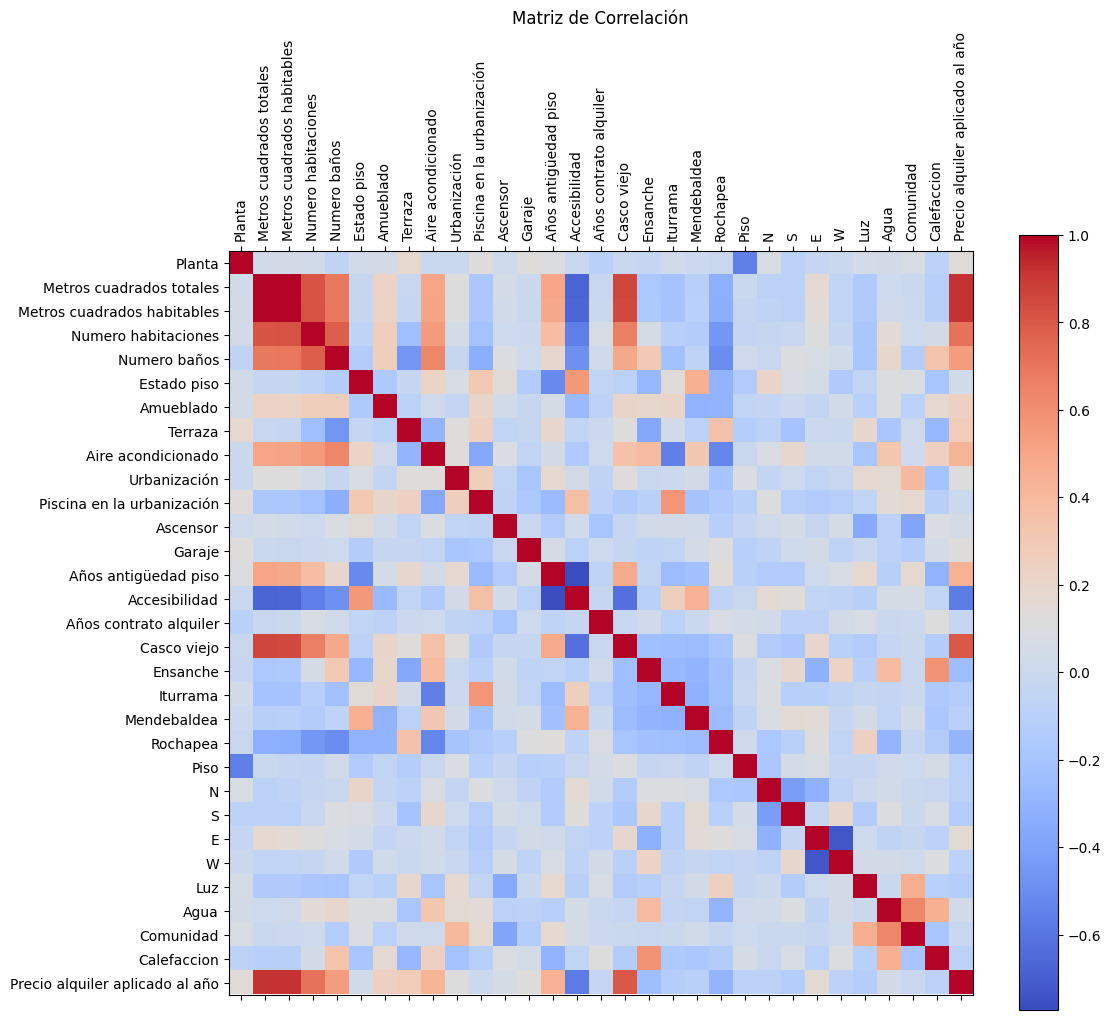

In [134]:
# Calcular la matriz de correlación
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))

# Crear la matriz de correlación
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matriz de Correlación")

plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

In [135]:
correlation_with_target = correlation_matrix.iloc[-1, :-1]

correlation_with_target

Planta                         0.138792
Metros cuadrados totales       0.912009
Metros cuadrados habitables    0.910096
Numero habitaciones            0.715039
Numero baños                   0.538705
Estado piso                    0.031629
Amueblado                      0.241384
Terraza                        0.273320
Aire acondicionado             0.421524
Urbanización                   0.111072
Piscina en la urbanización     0.009360
Ascensor                       0.061207
Garaje                         0.114319
Años antigüedad piso           0.437636
Accesibilidad                 -0.578155
Años contrato alquiler        -0.031981
Casco viejo                    0.799821
Ensanche                      -0.235389
Iturrama                      -0.126228
Mendebaldea                   -0.094476
Rochapea                      -0.288582
Piso                          -0.088369
N                             -0.081743
S                             -0.125951
E                              0.161085


In [136]:
# Calcular el índice de los elementos ordenados según el valor absoluto
indices_ordenados_abs = correlation_with_target.abs().argsort()[::-1]

# Usar los índices para ordenar la serie original
sort_corr = correlation_with_target.iloc[indices_ordenados_abs]

sort_corr

Metros cuadrados totales       0.912009
Metros cuadrados habitables    0.910096
Casco viejo                    0.799821
Numero habitaciones            0.715039
Accesibilidad                 -0.578155
Numero baños                   0.538705
Años antigüedad piso           0.437636
Aire acondicionado             0.421524
Rochapea                      -0.288582
Terraza                        0.273320
Amueblado                      0.241384
Ensanche                      -0.235389
E                              0.161085
Planta                         0.138792
Iturrama                      -0.126228
S                             -0.125951
Luz                           -0.125004
Garaje                         0.114319
Urbanización                   0.111072
Mendebaldea                   -0.094476
Piso                          -0.088369
Calefaccion                   -0.086284
N                             -0.081743
W                             -0.076708
Ascensor                       0.061207


In [137]:
correlation_matrix

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion,Precio alquiler aplicado al año
Planta,1.000000,0.034932,0.048057,0.033920,-0.059739,0.033351,0.050583,0.182457,-0.003608,-0.003438,0.122649,0.019711,0.119591,0.094685,-0.015967,-0.097594,-0.007585,-0.035770,0.038960,0.008523,-0.006901,-0.552956,0.072565,-0.085202,-0.037957,-0.002225,0.055186,0.044996,0.075070,-0.082341,0.138792
Metros cuadrados totales,0.034932,1.000000,0.993438,0.817279,0.684287,-0.028693,0.231298,-0.013701,0.497860,0.112778,-0.173008,0.056414,-0.001220,0.499209,-0.668576,-0.015714,0.856423,-0.165228,-0.202206,-0.101757,-0.329147,-0.002065,-0.082107,-0.092045,0.163328,-0.057848,-0.155776,0.013949,-0.001755,-0.111899,0.912009
Metros cuadrados habitables,0.048057,0.993438,1.000000,0.825660,0.689584,-0.021613,0.224146,-0.018346,0.507981,0.111373,-0.174909,0.042675,-0.008347,0.486878,-0.662278,-0.001887,0.847993,-0.159375,-0.203883,-0.098428,-0.329238,-0.021922,-0.060622,-0.080984,0.144788,-0.045871,-0.149044,0.029097,0.006083,-0.102098,0.910096
Numero habitaciones,0.033920,0.817279,0.825660,1.000000,0.782904,-0.068748,0.264202,-0.231200,0.544554,0.056475,-0.210866,0.012845,0.003173,0.376535,-0.561330,0.069530,0.662770,0.064664,-0.113857,-0.135278,-0.452866,-0.041919,-0.027101,-0.014431,0.113580,-0.025690,-0.182548,0.142123,0.010568,0.051379,0.715039
Numero baños,-0.059739,0.684287,0.689584,0.782904,1.000000,-0.133185,0.266013,-0.459077,0.628890,-0.023858,-0.329926,0.092508,0.013756,0.183524,-0.485450,0.029166,0.484563,0.299779,-0.216816,-0.070392,-0.496260,0.028317,-0.005966,0.096899,0.073025,0.040154,-0.189312,0.195382,-0.123307,0.342159,0.538705
Estado piso,0.033351,-0.028693,-0.021613,-0.068748,-0.133185,1.000000,-0.156187,-0.032917,0.224320,0.072686,0.306464,0.135046,-0.131025,-0.514874,0.562908,-0.056422,-0.080823,-0.276174,0.138013,0.447214,-0.299662,-0.139212,0.206915,0.084101,0.057606,-0.149027,-0.057606,0.101807,0.091502,-0.189064,0.031629
Amueblado,0.050583,0.231298,0.224146,0.264202,0.266013,-0.156187,1.000000,-0.089239,0.027695,-0.038745,0.198075,0.037600,-0.020304,0.062985,-0.262376,-0.077196,0.210079,0.194038,0.205444,-0.308410,-0.298770,-0.057602,-0.039934,0.008318,-0.041567,0.032212,-0.099703,0.095061,-0.088882,0.168919,0.241384
Terraza,0.182457,-0.013701,-0.018346,-0.231200,-0.459077,-0.032917,-0.089239,1.000000,-0.288863,0.120703,0.244527,-0.056698,-0.022497,0.188868,-0.049141,0.005135,0.114968,-0.363857,0.047702,-0.090167,0.346091,-0.127508,-0.083866,-0.198535,0.007964,-0.001345,0.184669,-0.180989,0.030440,-0.275802,0.273320
Aire acondicionado,-0.003608,0.497860,0.507981,0.544554,0.628890,0.224320,0.027695,-0.288863,1.000000,0.133994,-0.365724,0.087643,-0.051060,0.049131,-0.146650,0.014134,0.353693,0.389652,-0.552923,0.308457,-0.531791,-0.008580,0.086118,0.185573,0.037788,0.041814,-0.187292,0.321387,0.018329,0.243343,0.421524
Urbanización,-0.003438,0.112778,0.111373,0.056475,-0.023858,0.072686,-0.038745,0.120703,0.133994,1.000000,0.253347,-0.047841,-0.185569,0.165804,0.045095,-0.064057,0.123988,-0.000975,0.009576,0.048267,-0.193318,0.088861,-0.039369,0.010737,-0.048761,-0.010803,0.165067,0.161664,0.404405,-0.205253,0.111072


In [138]:
threshold_corr = 0.2  # Umbral de correlación

# Encuentra las variables con correlación absoluta por debajo del umbral
low_correlation_vars = correlation_with_target[abs(correlation_with_target) < threshold_corr].index

# Elimina las variables con correlación baja del DataFrame original
filtered_data = dataset.drop(columns=low_correlation_vars)

print(filtered_data.columns)

Index(['Metros cuadrados totales', 'Metros cuadrados habitables',
       'Numero habitaciones', 'Numero baños', 'Amueblado', 'Terraza',
       'Aire acondicionado', 'Años antigüedad piso', 'Accesibilidad',
       'Casco viejo', 'Ensanche', 'Rochapea',
       'Precio alquiler aplicado al año'],
      dtype='object')


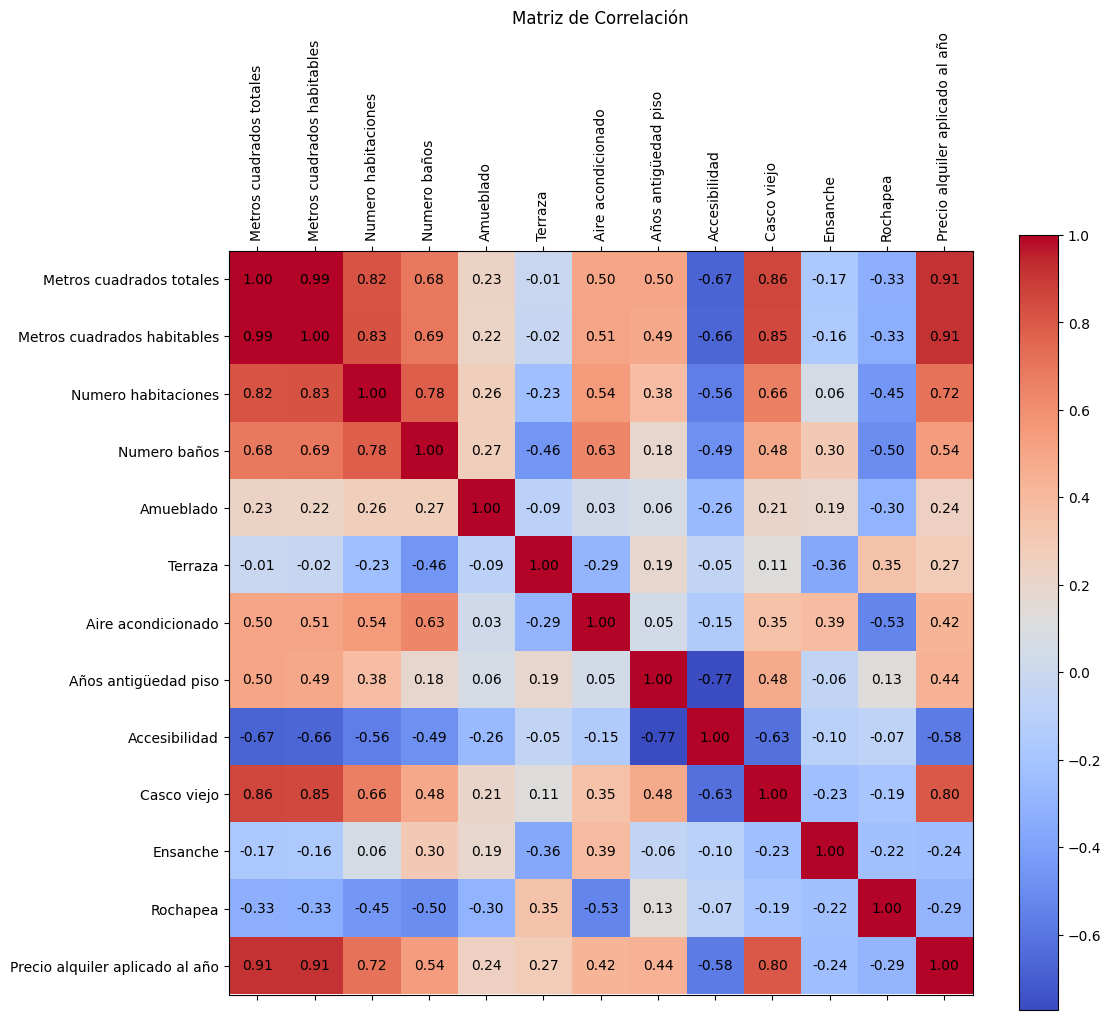

In [139]:
# Calcular la matriz de correlación
correlation_matrix = filtered_data.corr()

plt.figure(figsize=(12, 10))

# Crear la matriz de correlación
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matriz de Correlación")

# Añadir los valores de correlación como texto en cada celda
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black')

plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

In [140]:
dataset_filtrado = filtered_data.drop(['Metros cuadrados habitables', 'Numero habitaciones', 'Numero baños', 'Casco viejo', 'Accesibilidad'], axis=1)

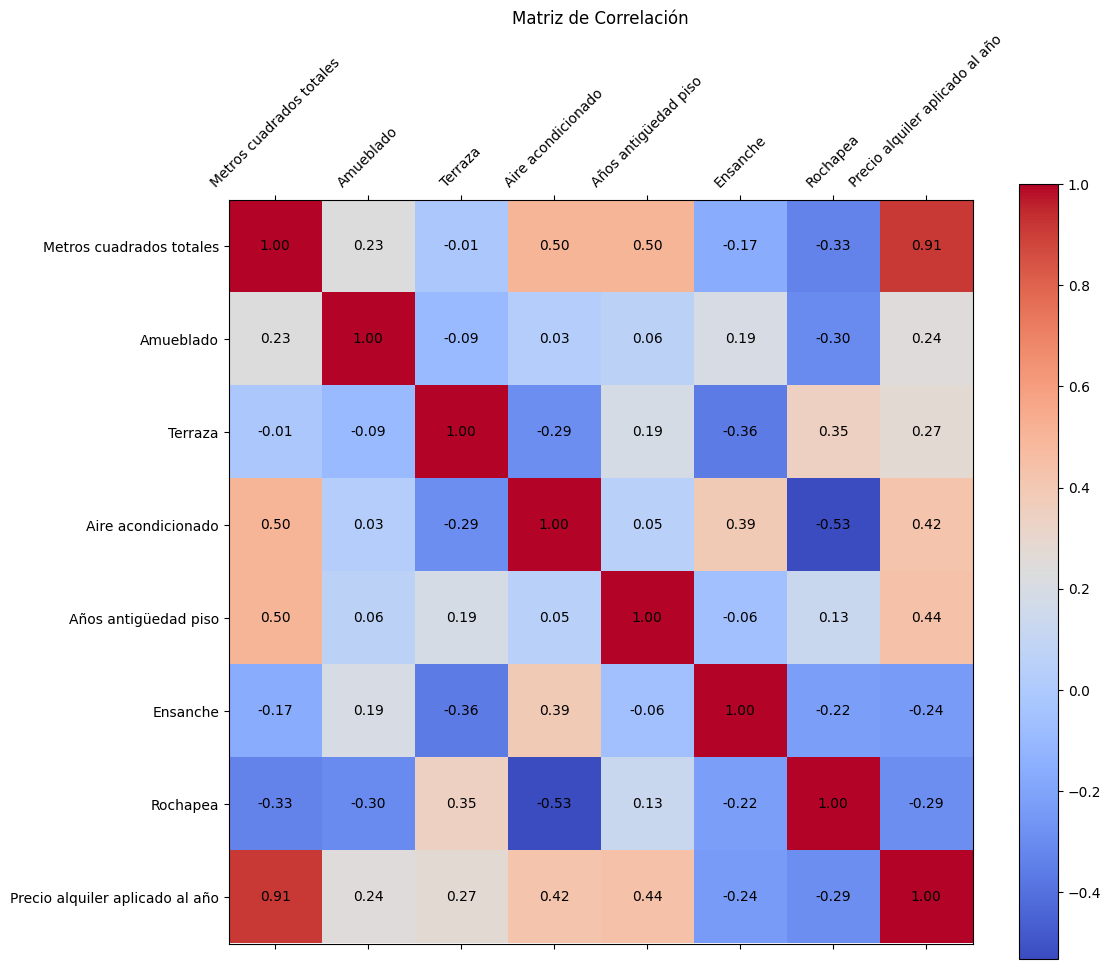

In [141]:
# Calcular la matriz de correlación
correlation_matrix = dataset_filtrado.corr()

plt.figure(figsize=(12, 10))

# Crear la matriz de correlación
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matriz de Correlación")

# Añadir los valores de correlación como texto en cada celda
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black')

plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

In [142]:
filtr = dataset_num[dataset_filtrado.columns]

filtr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Metros cuadrados totales         180 non-null    float64
 1   Amueblado                        180 non-null    int64  
 2   Terraza                          180 non-null    int64  
 3   Aire acondicionado               180 non-null    int64  
 4   Años antigüedad piso             180 non-null    int64  
 5   Ensanche                         180 non-null    int64  
 6   Rochapea                         180 non-null    int64  
 7   Precio alquiler aplicado al año  180 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 12.7 KB


In [146]:
df1 = filtr.select_dtypes(exclude='int64').drop(columns='Precio alquiler aplicado al año')

df2 = filtr.select_dtypes(include='int64')

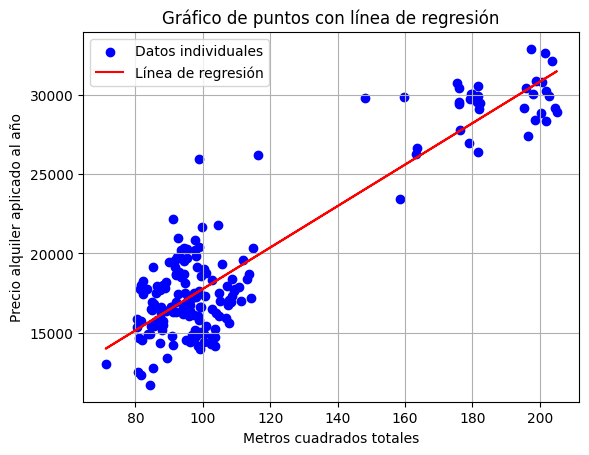

In [147]:
from sklearn.linear_model import LinearRegression

for i in df1.columns:
    # Seleccionar las dos columnas que deseas graficar
    x = dataset_num[i].values.reshape(-1, 1)
    y = dataset_num['Precio alquiler aplicado al año'].values

    # Crear el modelo de regresión lineal
    regression = LinearRegression()
    regression.fit(x, y)

    # Predecir los valores de Y utilizando el modelo entrenado
    y_pred = regression.predict(x)

    # Crear la gráfica
    plt.scatter(x, y, color='blue',label='Datos individuales')  # Dibujar los puntos individuales
    plt.plot(x, y_pred, color='red', label='Línea de regresión')  # Dibujar la línea de regresión
    plt.title('Gráfico de puntos con línea de regresión')
    plt.xlabel(i)
    plt.ylabel('Precio alquiler aplicado al año')
    plt.legend()  # Mostrar la leyenda
    plt.grid(True)  # Mostrar la cuadrícula en el gráfico
    plt.show()

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


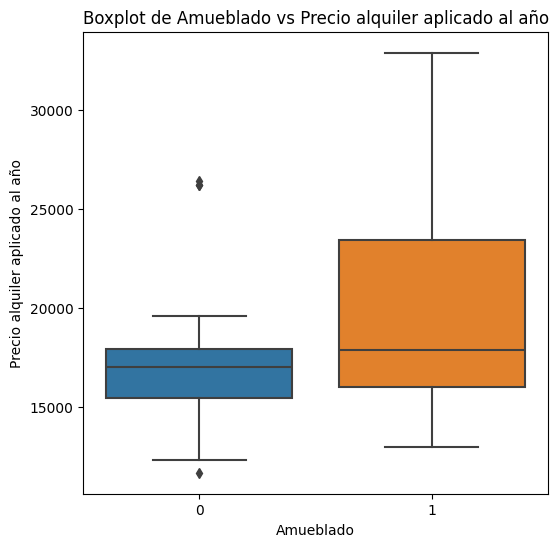

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


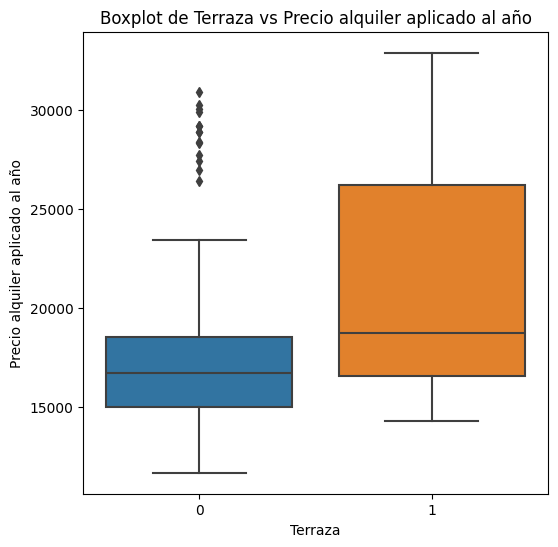

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


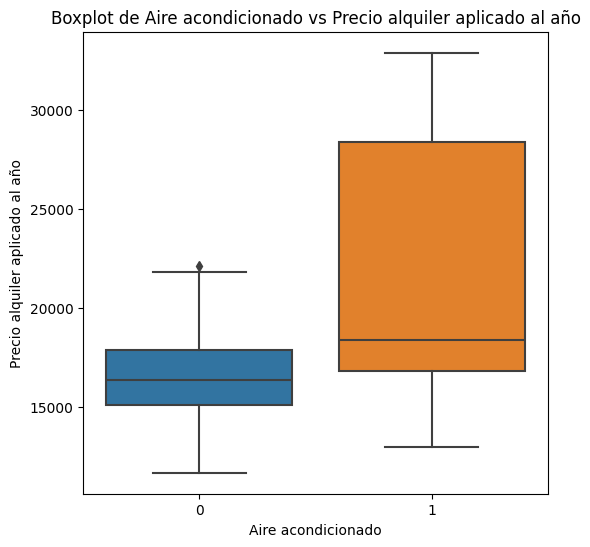

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


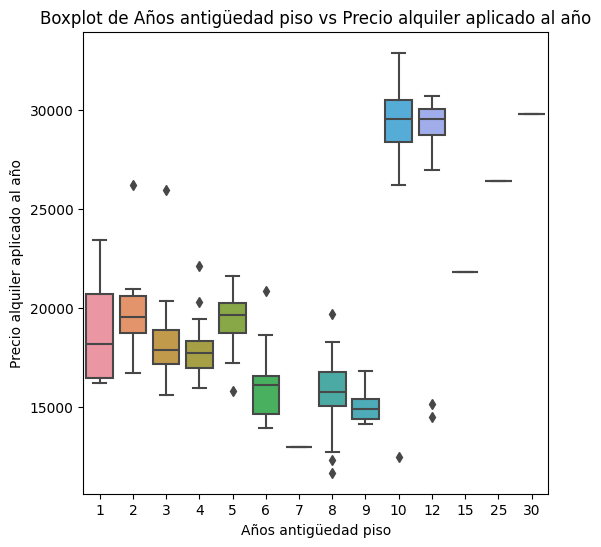

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


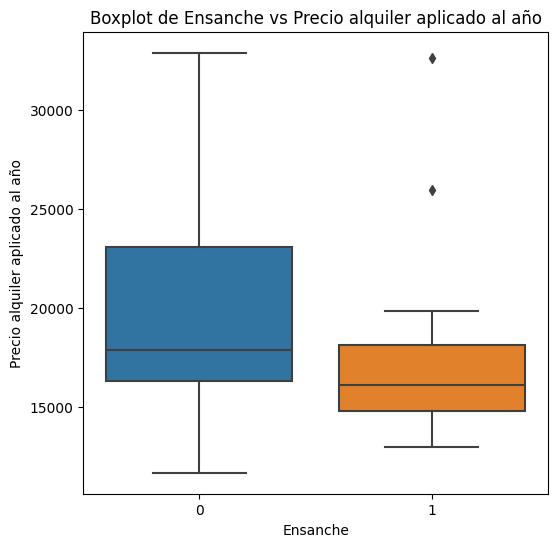

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


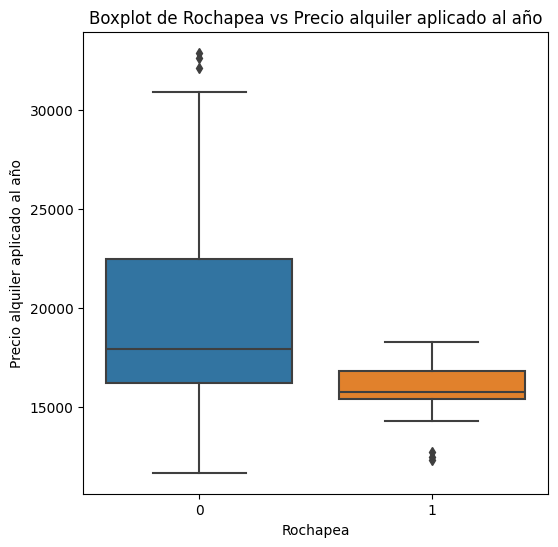

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre las columnas del DataFrame
for i in df2.columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=dataset_num[i], y=dataset_num['Precio alquiler aplicado al año'])
    
    # Configurar la gráfica
    plt.title(f'Boxplot de {i} vs Precio alquiler aplicado al año')
    plt.xlabel(i)
    plt.ylabel('Precio alquiler aplicado al año')
    plt.show()


---
---

In [149]:
dir = '../data/v3.1_filtered_data'

dataset_filtrado.to_csv(dir+'.csv', index=True)
dataset_filtrado.to_excel(dir+'.xlsx', index=True)

---
---
# Modelo 1: Predicción precio alquiler aplicado al año

In [150]:
dataset_filtrado.shape

(180, 8)

In [151]:
x_dataset = dataset_filtrado.iloc[:,:-1]

In [152]:
y_dataset = dataset_filtrado.iloc[:,-1]

In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.3, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [154]:
testing = pd.concat([x_test, y_test], axis=1)

In [155]:
testing

,Metros cuadrados totales,Amueblado,Terraza,Aire acondicionado,Años antigüedad piso,Ensanche,Rochapea,Precio alquiler aplicado al año
ID,,,,,,,,
20,0.805680,1,0,1,0.379310,0,0,26977.384000
43,0.187593,1,0,1,0.275862,1,0,14390.045000
154,0.982810,1,0,1,0.310345,0,0,29922.344000
79,0.822870,1,1,1,0.379310,0,0,29558.501000
146,0.176383,1,0,1,0.103448,0,0,16765.419000
16,0.106876,0,1,0,0.241379,0,1,15395.908000
25,0.661435,1,1,1,0.310345,0,0,29881.856400
69,0.830344,1,1,1,0.379310,0,0,29515.792000
114,0.953662,1,0,1,0.310345,0,0,30901.476000


In [156]:
dir = '../data/testing_v1'

testing.to_excel(dir+'.xlsx', index=True)

In [157]:
t, testing_completo = train_test_split(dataset_num, test_size=0.3, random_state=42)

In [158]:
dir = '../data/testing_completo'

testing_completo.to_excel(dir+'.xlsx', index=True)

In [159]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(113, 7)
(13, 7)
(54, 7)


In [160]:
from tensorflow import keras
from keras import regularizers

num_columnas = x_train.shape[1]

model_v1 = keras.Sequential([
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(num_columnas,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='relu')
])

model_v1.summary()

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 908)            │         7,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 1)              │           909 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,135,033 (15.77 MB)

 Trainable params: 4,135,033 (15.77 MB)

 Non-trainable params: 0 (0.00 B)

In [161]:
model_v1.compile(optimizer='adam', loss='mean_squared_error')

history = model_v1.fit(x_train, y_train, epochs=2, batch_size=4, validation_data=(x_val, y_val))

Epoch 1/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 337760224.0000 - val_loss: 29021868.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 38684684.0000 - val_loss: 19540608.0000


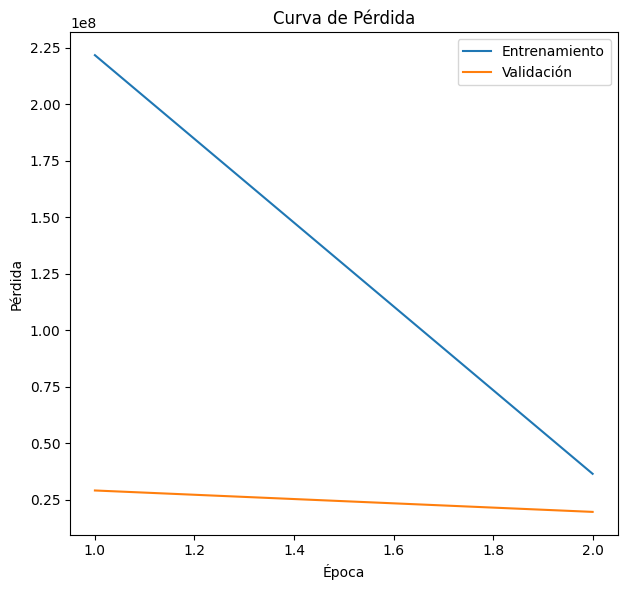

In [162]:
plt.figure(figsize=(12, 6))

# Curvas de pérdida
epochs = range(1, len(history.history['loss']) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Entrenamiento')
plt.plot(epochs, history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [163]:
test_predict = model_v1.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [164]:
ruta_archivo = 'models/model_precio_alquiler.txt'

with open(ruta_archivo, 'r') as archivo:
    n = float(archivo.read().strip())

In [165]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_test = np.sqrt(mean_squared_error(test_predict, y_test))
print("RMSE (prueba):", rmse_test)
r2_test = r2_score(test_predict, y_test)
print("R^2 (prueba):", r2_test)

RMSE (prueba): 4697.43747742708
R^2 (prueba): -0.35050918351837423


In [166]:
if r2_test > n:
    model_v1.save('models/model_v1.h5')
    try:
        with open(ruta_archivo, 'w') as archivo:
            archivo.write(str(r2_test))
        print(f'El nuevo mejor valor es {r2_test} y ha sido escrito en el archivo {ruta_archivo}.')
    except IOError as e:
        print(f'Error al escribir en el archivo {ruta_archivo}: {e}')
else:
    print(f'El mejor valor sigue siendo {n}')

El mejor valor sigue siendo 0.9300767982135506


In [167]:
model_v1.input_shape

(None, 7)

In [168]:
#Para obtener el mejor modelo

num_columnas = x_train.shape[1]

for i in range(10):    
    print(f"----------{i}----------")

    model_v1 = keras.Sequential([
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(num_columnas,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='relu')  
    ])

    model_v1.compile(optimizer='adam', loss='mean_squared_error')

    history = model_v1.fit(x_train, y_train, epochs=2, batch_size=4, validation_data=(x_val, y_val))

    test_predict = model_v1.predict(x_test)

    ruta_archivo = 'models/model_precio_alquiler.txt'

    with open(ruta_archivo, 'r') as archivo:
        n = float(archivo.read().strip())

    rmse_test = np.sqrt(mean_squared_error(test_predict, y_test))
    print("RMSE (prueba):", rmse_test)
    r2_test = r2_score(test_predict, y_test)
    print("R^2 (prueba):", r2_test)

    if r2_test > n:
        model_v1.save('models/model_v1.h5')
        try:
            with open(ruta_archivo, 'w') as archivo:
                archivo.write(str(r2_test))
            print(f'El nuevo mejor valor es {r2_test} y ha sido escrito en el archivo {ruta_archivo}.')
        except IOError as e:
            print(f'Error al escribir en el archivo {ruta_archivo}: {e}')
    else:
        print(f'El mejor valor sigue siendo {n}')

----------0----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 331633600.0000 - val_loss: 16420038.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 16999898.0000 - val_loss: 3346267.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
RMSE (prueba): 2102.824400777487
R^2 (prueba): 0.8676200635571514
El mejor valor sigue siendo 0.9300767982135506
----------1----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 318123936.0000 - val_loss: 124998992.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 53768724.0000 - val_loss: 4089898.5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
RMSE (prueba): 2510.5093882290125
R^2 (prueba): 0.7680457948358617
El mejor valor sigue siendo 0.9300767982135506
----------2----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 380698304.0000 - val_loss: 67464440.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 33884700.0000 - val_loss: 3901244.5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
RMSE (prueba): 2326.9331144852013
R^2 (prueba): 0.7953789670211053
El mejor valor sigue siendo 0.9300767982135506
----------3----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 356991872.0000 - val_loss: 115862984.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 58001472.0000 - val_loss: 4887263.5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
RMSE (prueba): 2558.45331179322
R^2 (prueba): 0.7037598193555219
El mejor valor sigue siendo 0.9300767982135506
----------4----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 307809184.0000 - val_loss: 12893870.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 20357922.0000 - val_loss: 2469900.2500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
RMSE (prueba): 1756.1356897787189
R^2 (prueba): 0.889289530980705
El mejor valor sigue siendo 0.9300767982135506
----------5----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 326324704.0000 - val_loss: 54348444.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 40332304.0000 - val_loss: 10856783.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
RMSE (prueba): 3775.733977877826
R^2 (prueba): 0.290570809642531
El mejor valor sigue siendo 0.9300767982135506
----------6----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 324411456.0000 - val_loss: 77323560.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 34958800.0000 - val_loss: 9913294.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
RMSE (prueba): 3495.556320671826
R^2 (prueba): 0.398032302707935
El mejor valor sigue siendo 0.9300767982135506
----------7----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 368268800.0000 - val_loss: 115361232.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 55029684.0000 - val_loss: 6854673.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
RMSE (prueba): 2925.0678431771835
R^2 (prueba): 0.6142458852940271
El mejor valor sigue siendo 0.9300767982135506
----------8----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 320529600.0000 - val_loss: 30478460.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 28339954.0000 - val_loss: 5492171.5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
RMSE (prueba): 2559.748996444664
R^2 (prueba): 0.7829004202869625
El mejor valor sigue siendo 0.9300767982135506
----------9----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 318107360.0000 - val_loss: 70408456.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 29646958.0000 - val_loss: 10119284.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
RMSE (prueba): 3688.618776821689
R^2 (prueba): 0.44064457313914873
El mejor valor sigue siendo 0.9300767982135506
